### NOP58_GLU and CBF5_GLU titration clustering
In order to determine how well we can distinguish between groups in the depletion experiments we want to cluster decreasing numbers of randomly sampled reads to see our detection limit

In [4]:
import umap
import hdbscan
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import numpy as np
import pandas as pd
import os
import seaborn as sns
import re
from read_clustering.variant_call import VariantCall, VariantCalls
threshold = 0.5

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
ivt_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/canonical_ivt_round30_alt_canonical_supervised_500_500.model.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_cbf5_glu_round30_alt_canonical_supervised_500_500.model.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_nop58_glu_round30_alt_canonical_supervised_500_500.model.csv"       
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_cbf5_gal_round30_alt_canonical_supervised_500_500.model.csv"
native_nop58_gal_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/native_nop58_gal_round30_alt_canonical_supervised_500_500.model.csv"

file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, native_cbf5_gal_path, native_nop58_gal_path]
labels = ["ivt", "cbf5_glu_psu_depletion", "nop58_glu_2o_depletion", "native_cbf5_gal", "native_nop58_gal"]

In [6]:
figures = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/simulation"

## CBF5 GLU (pseudoU depletion)

In [9]:
file_paths = [cbf5_glu_psu_depletion_path]
labels = ["cbf5_glu_psu_depletion"]
vc = VariantCalls(file_paths, labels)


/Users/andrewbailey/CLionProjects/read_clustering/src/read_clustering/variant_call.py:799: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["umap_result_x"] = umap_results[:, 0]
/Users/andrewbailey/CLionProjects/read_clustering/src/read_clustering/variant_call.py:800: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["umap_result_y"] = umap_results[:, 1]


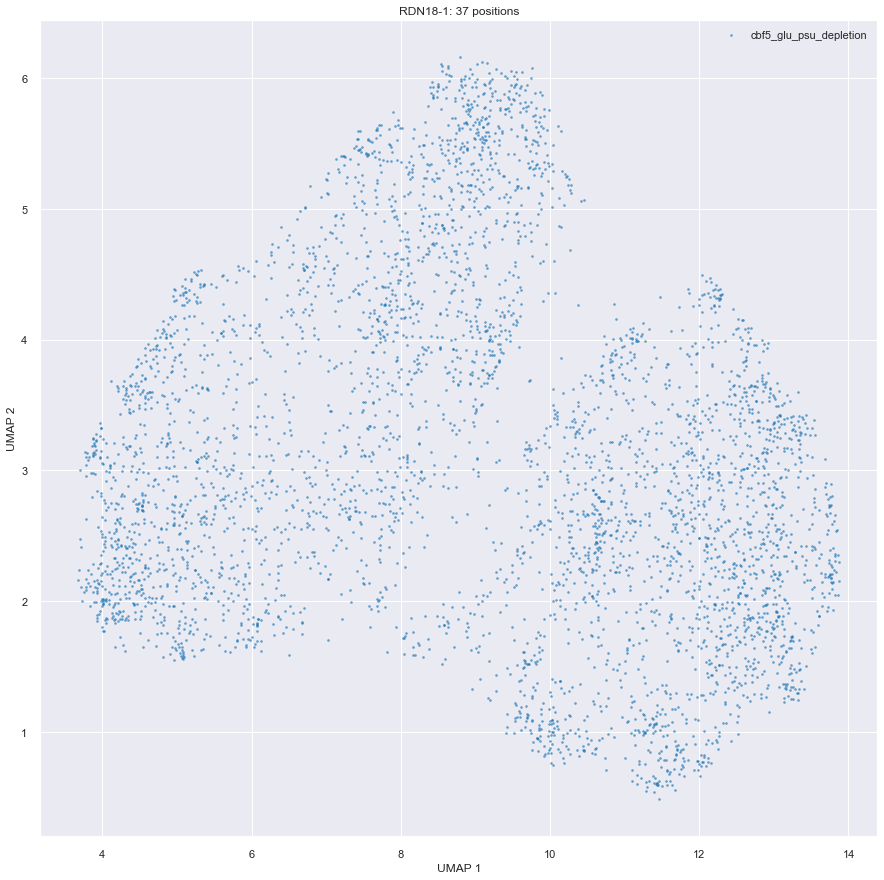

In [10]:
contig = 'RDN18-1'
n_components = 2
save_fig_path = None
# all reads umap plot
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

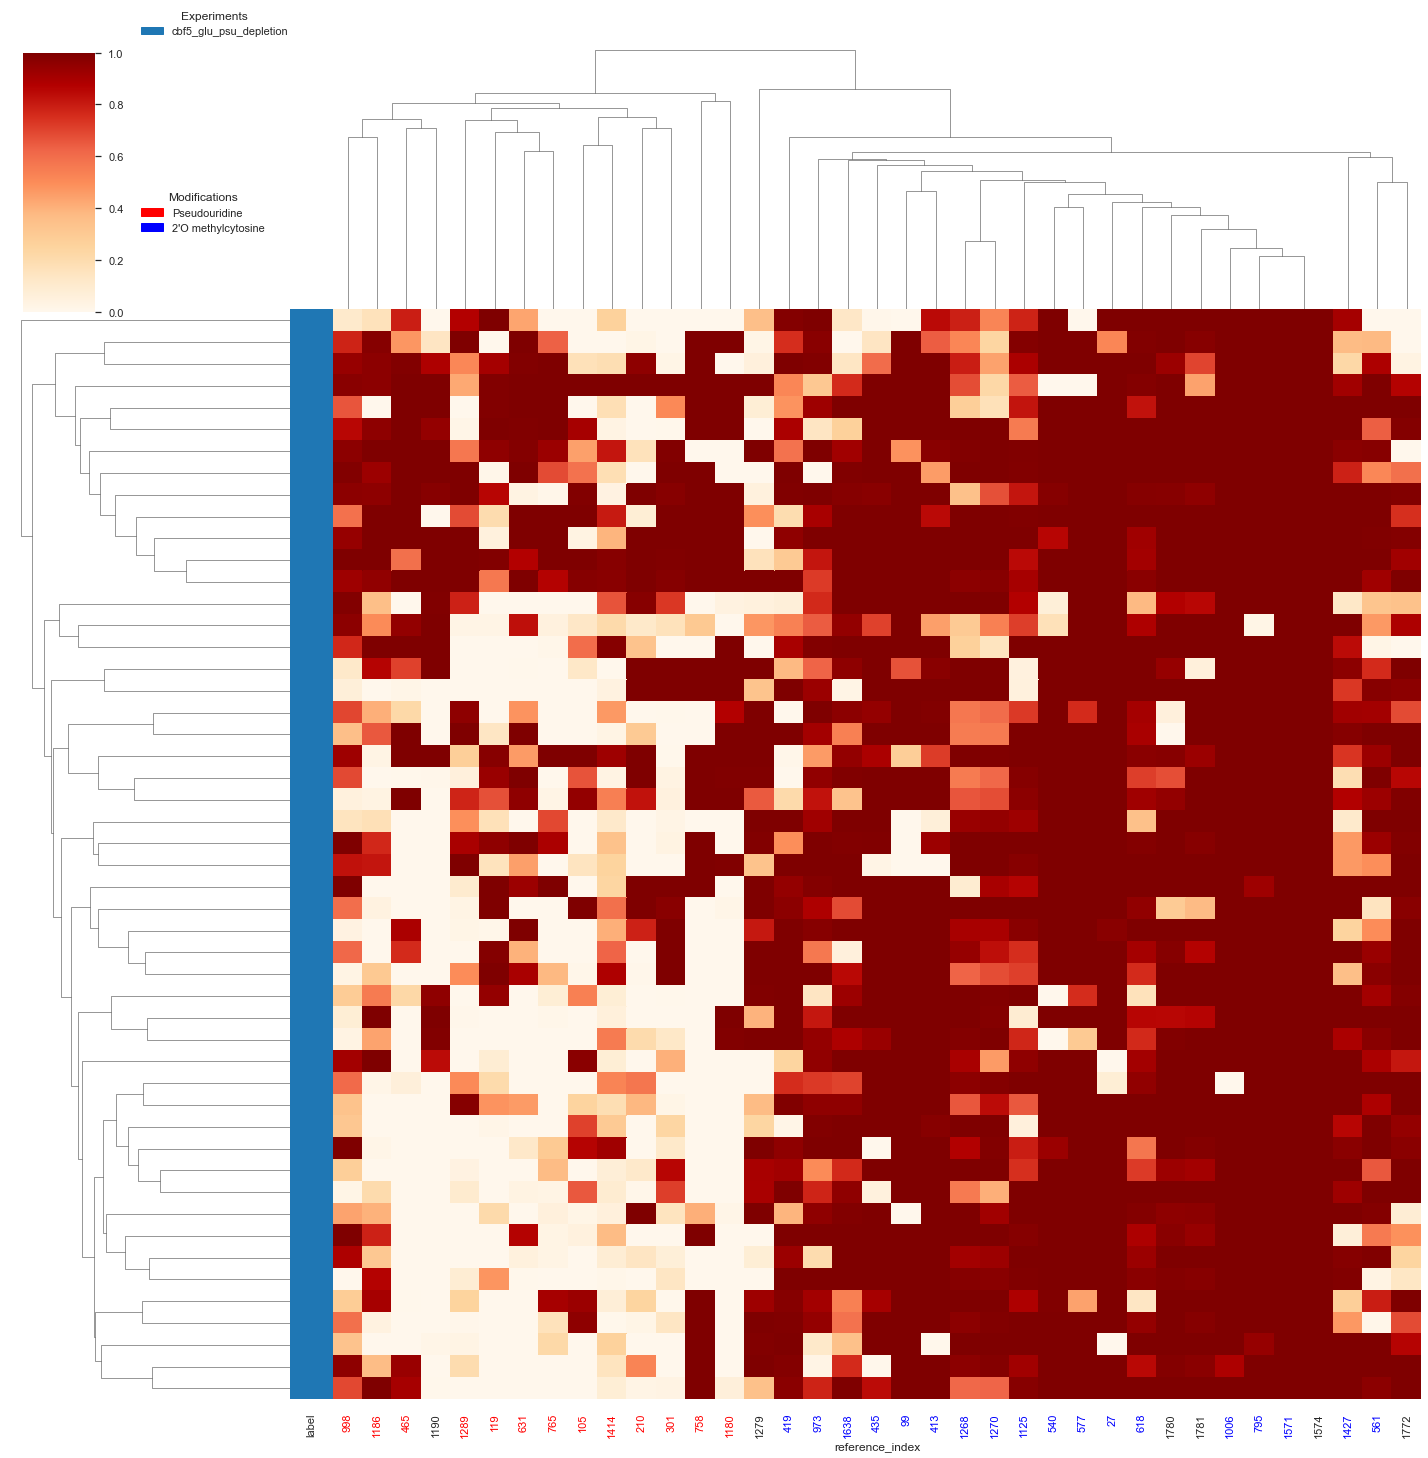

In [13]:
# 50 reads 18S
n = 50
# metric = "cityblock"
metric = 'euclidean'
method = 'average'
contig = 'RDN18-1'

figure_path = None
vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                          metric=metric,
                          method=method)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

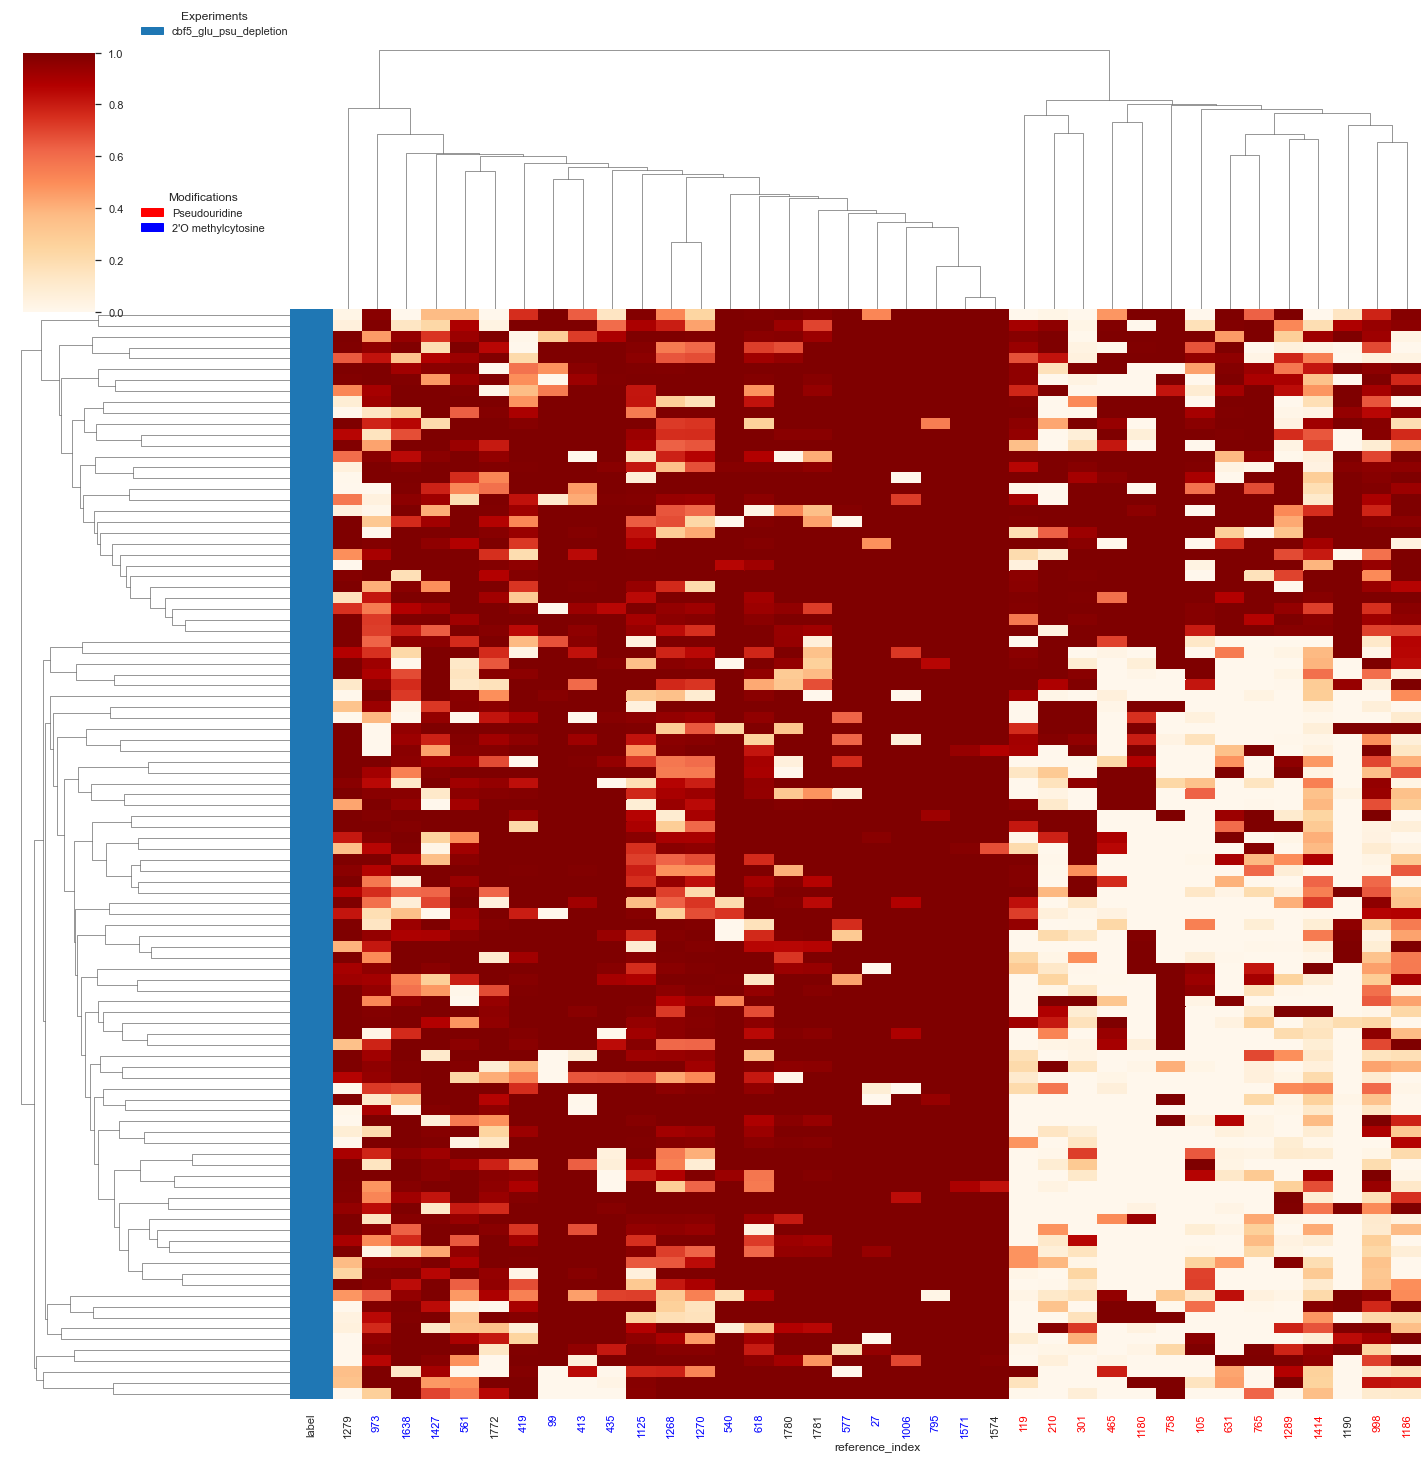

In [14]:
# 100 reads 18S
vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=100, figure_path=figure_path,
                          metric=metric,
                          method=method)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

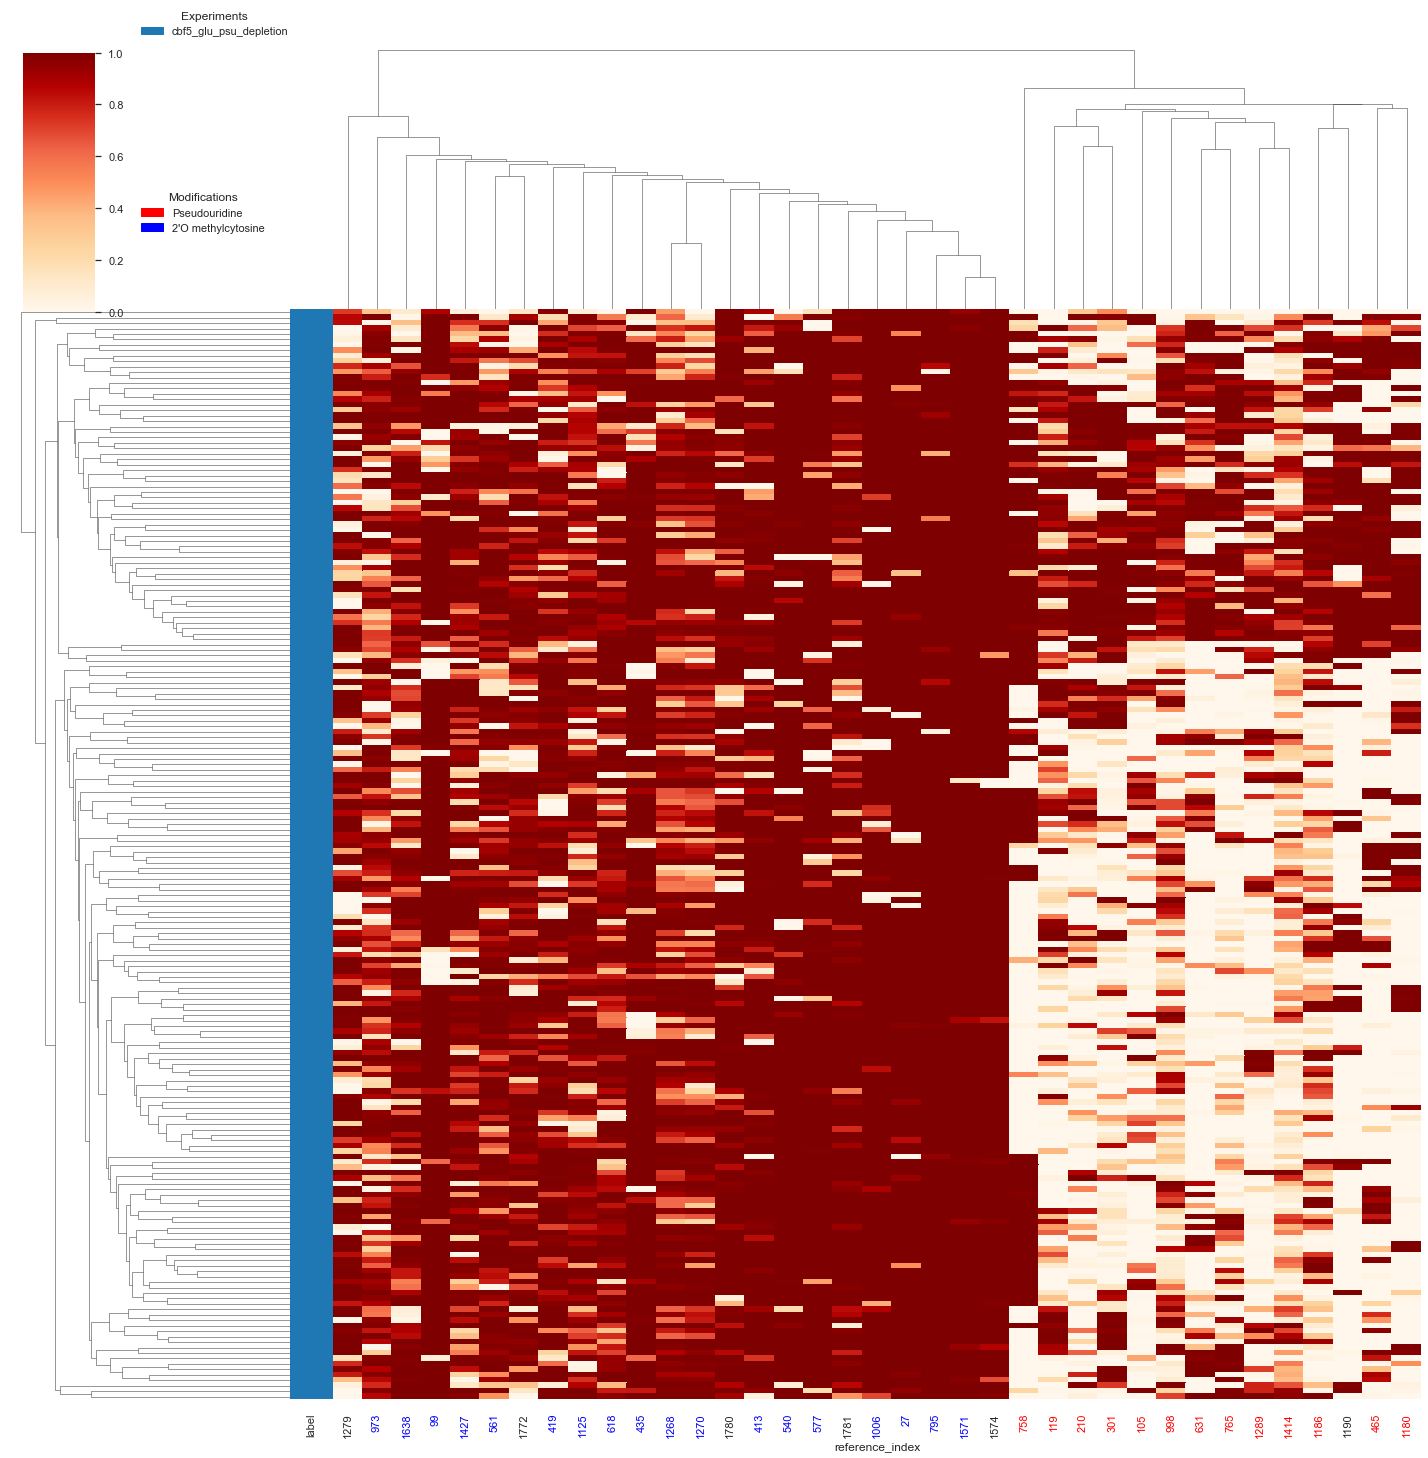

In [15]:
# 200 reads 18S

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=200, figure_path=figure_path,
                          metric=metric,
                          method=method)


# NOP58 GLU (2'O depletion)

In [16]:
file_paths = [nop58_glu_2o_depletion_path]
labels = ["nop58_glu_2o_depletion_path"]
vc = VariantCalls(file_paths, labels)


/Users/andrewbailey/CLionProjects/read_clustering/src/read_clustering/variant_call.py:799: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["umap_result_x"] = umap_results[:, 0]
/Users/andrewbailey/CLionProjects/read_clustering/src/read_clustering/variant_call.py:800: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["umap_result_y"] = umap_results[:, 1]


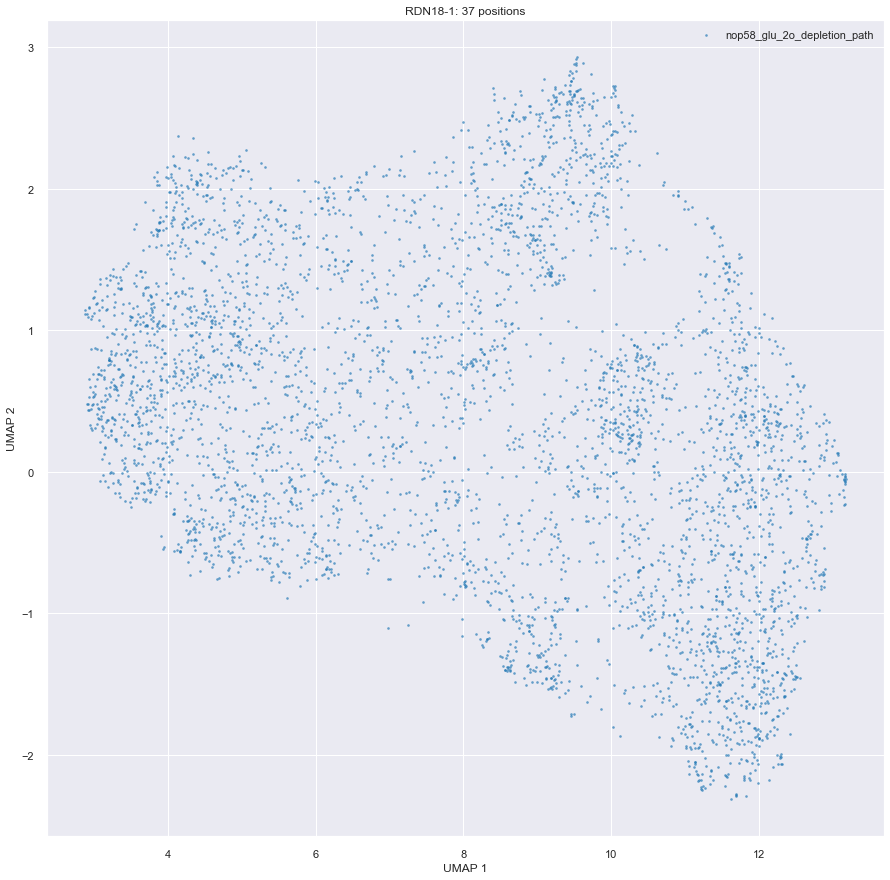

In [27]:
# metric = "cityblock"
metric = 'euclidean'
method = 'average'
contig = 'RDN18-1'
# all reads umap plot
figure_path = None
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=2, figure_path=None)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

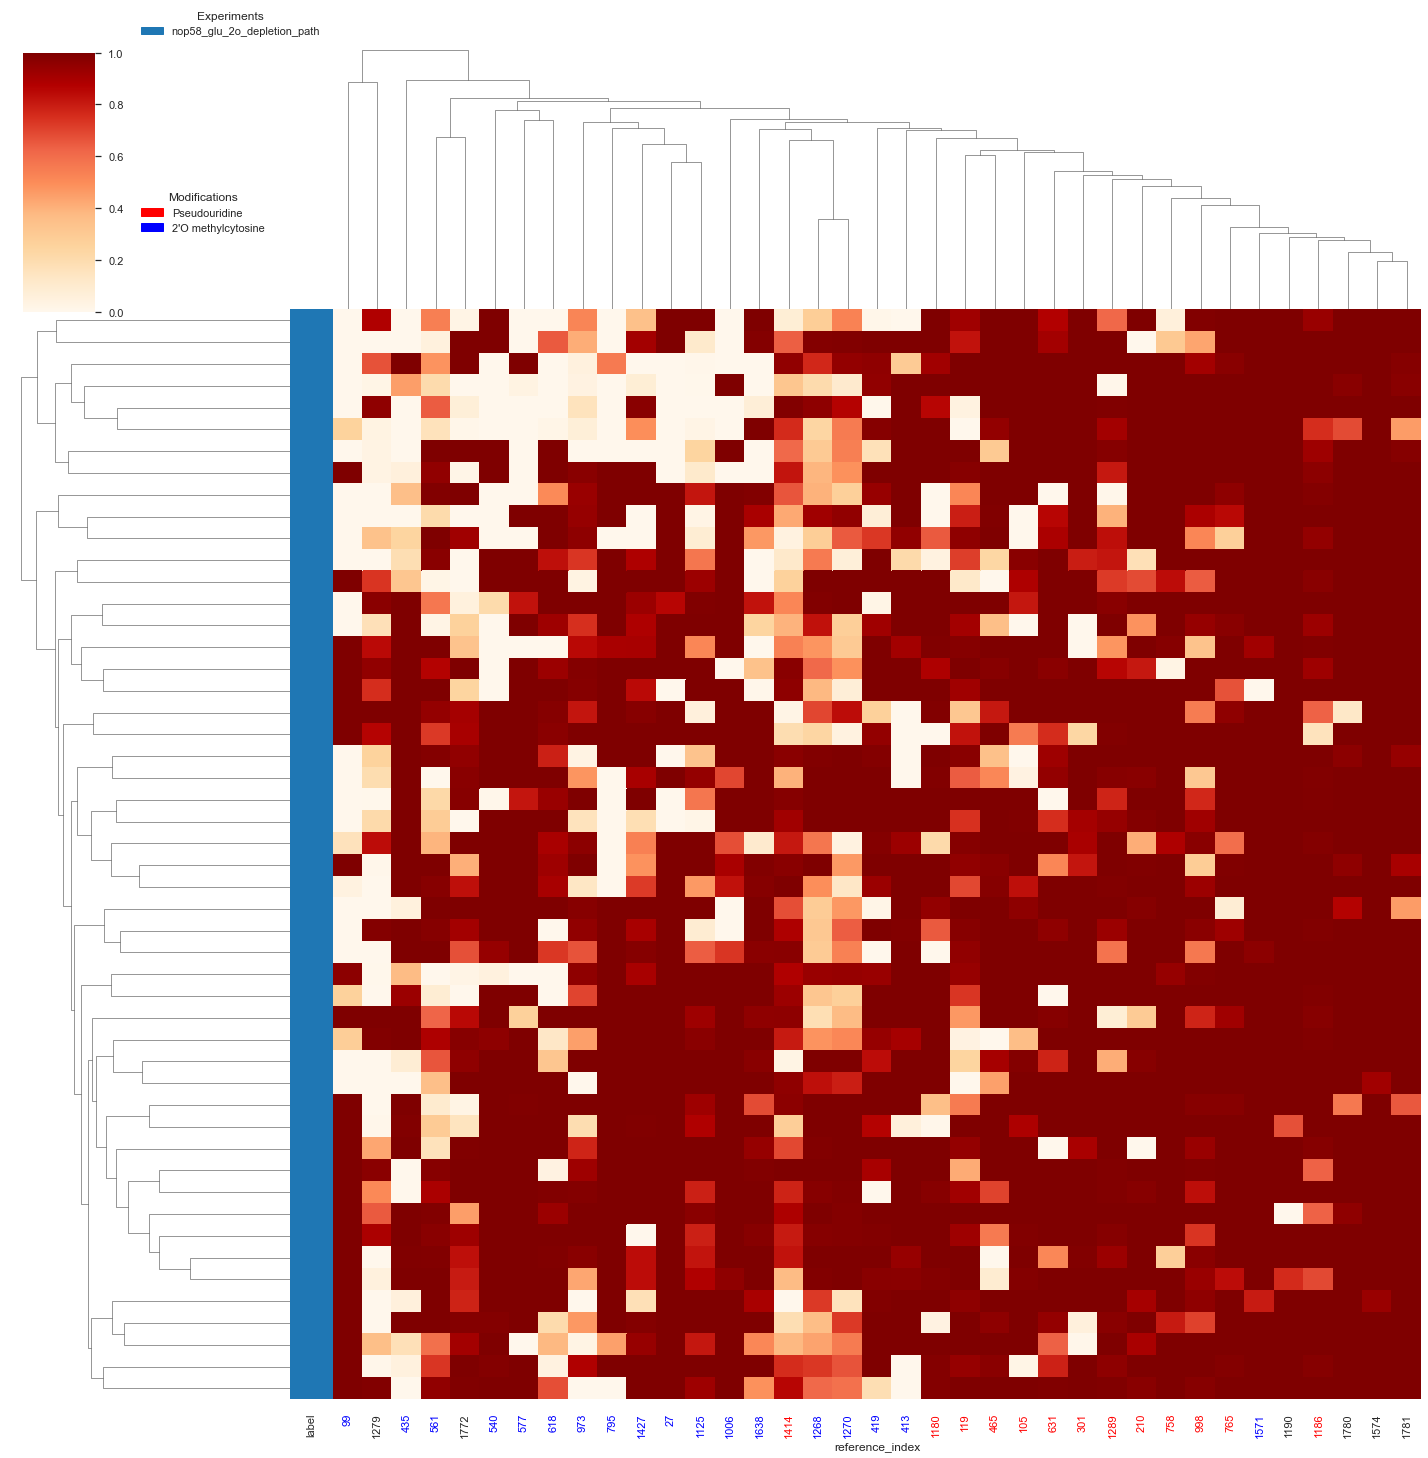

In [18]:
# 50 reads 18S
n = 50
vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                          metric=metric,
                          method=method)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

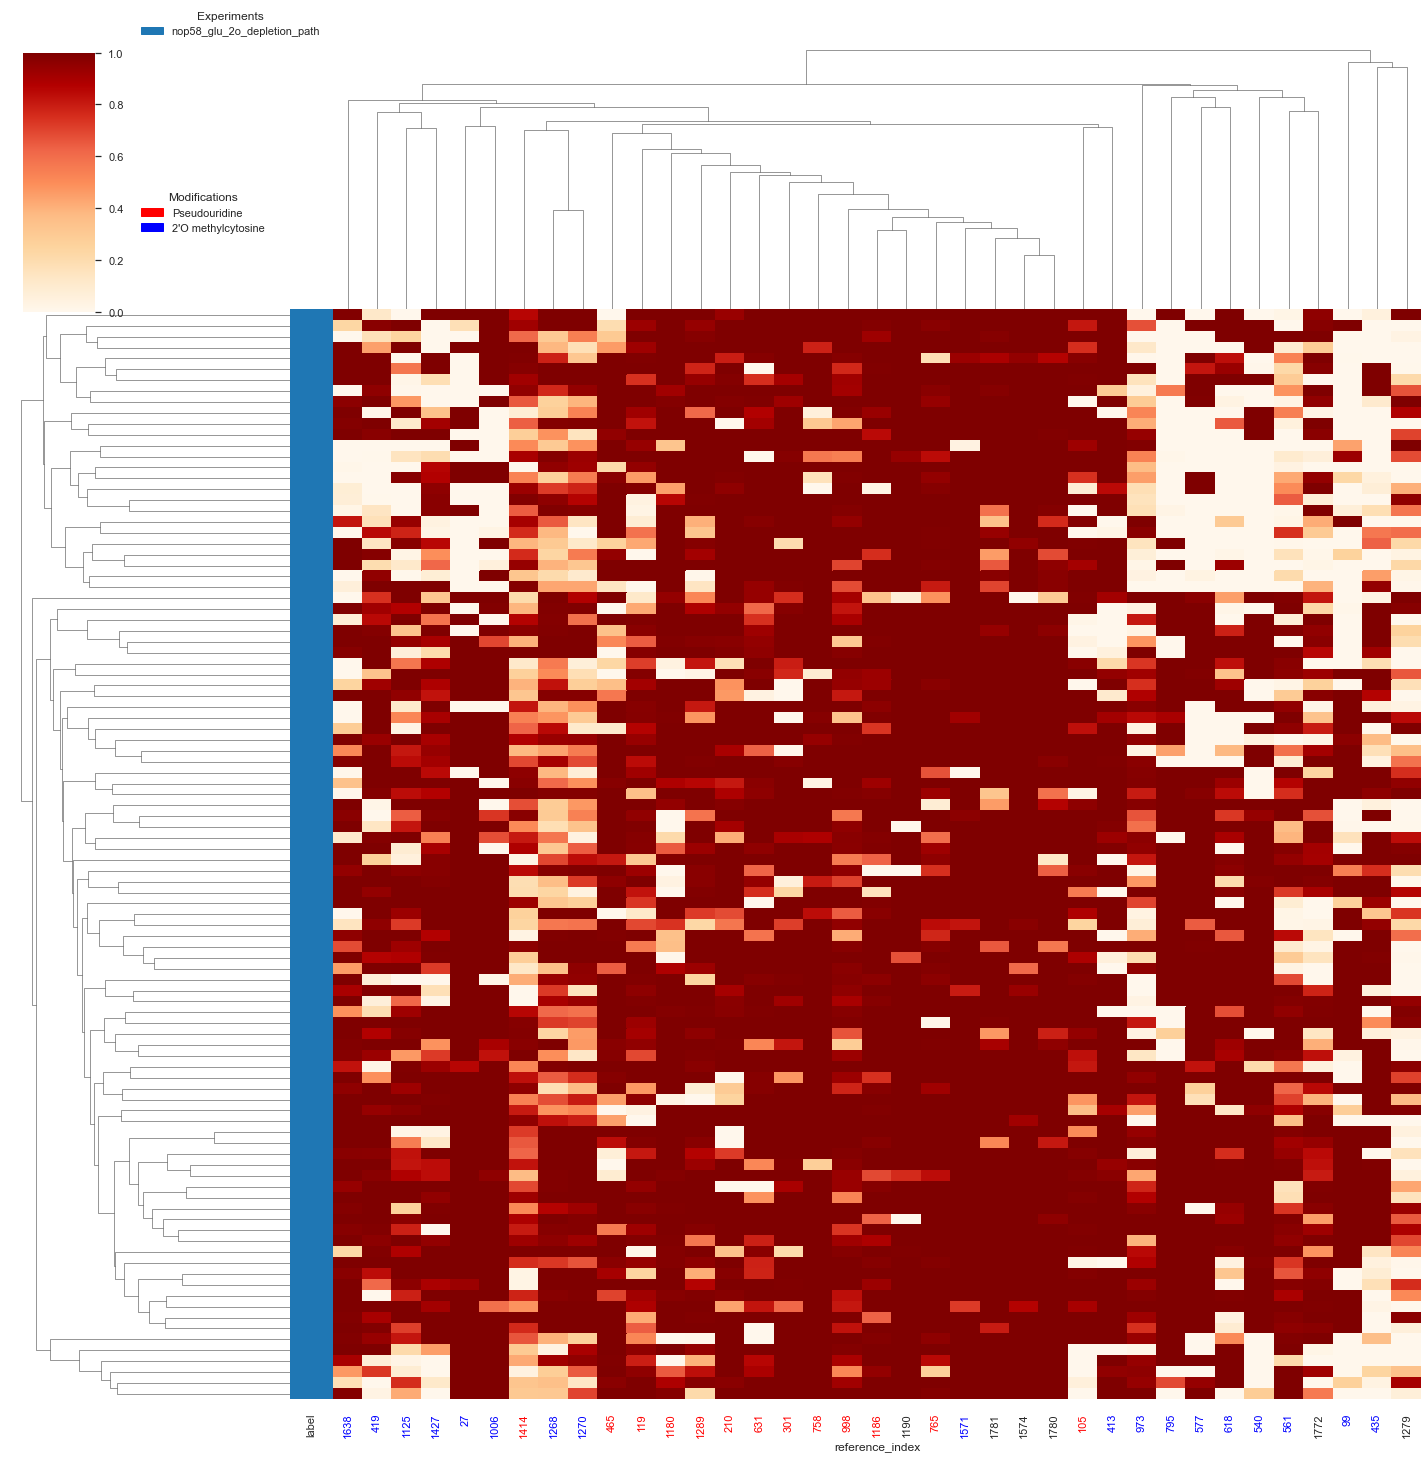

In [19]:
# 100 reads 18S

n = 100
vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                          metric=metric,
                          method=method)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

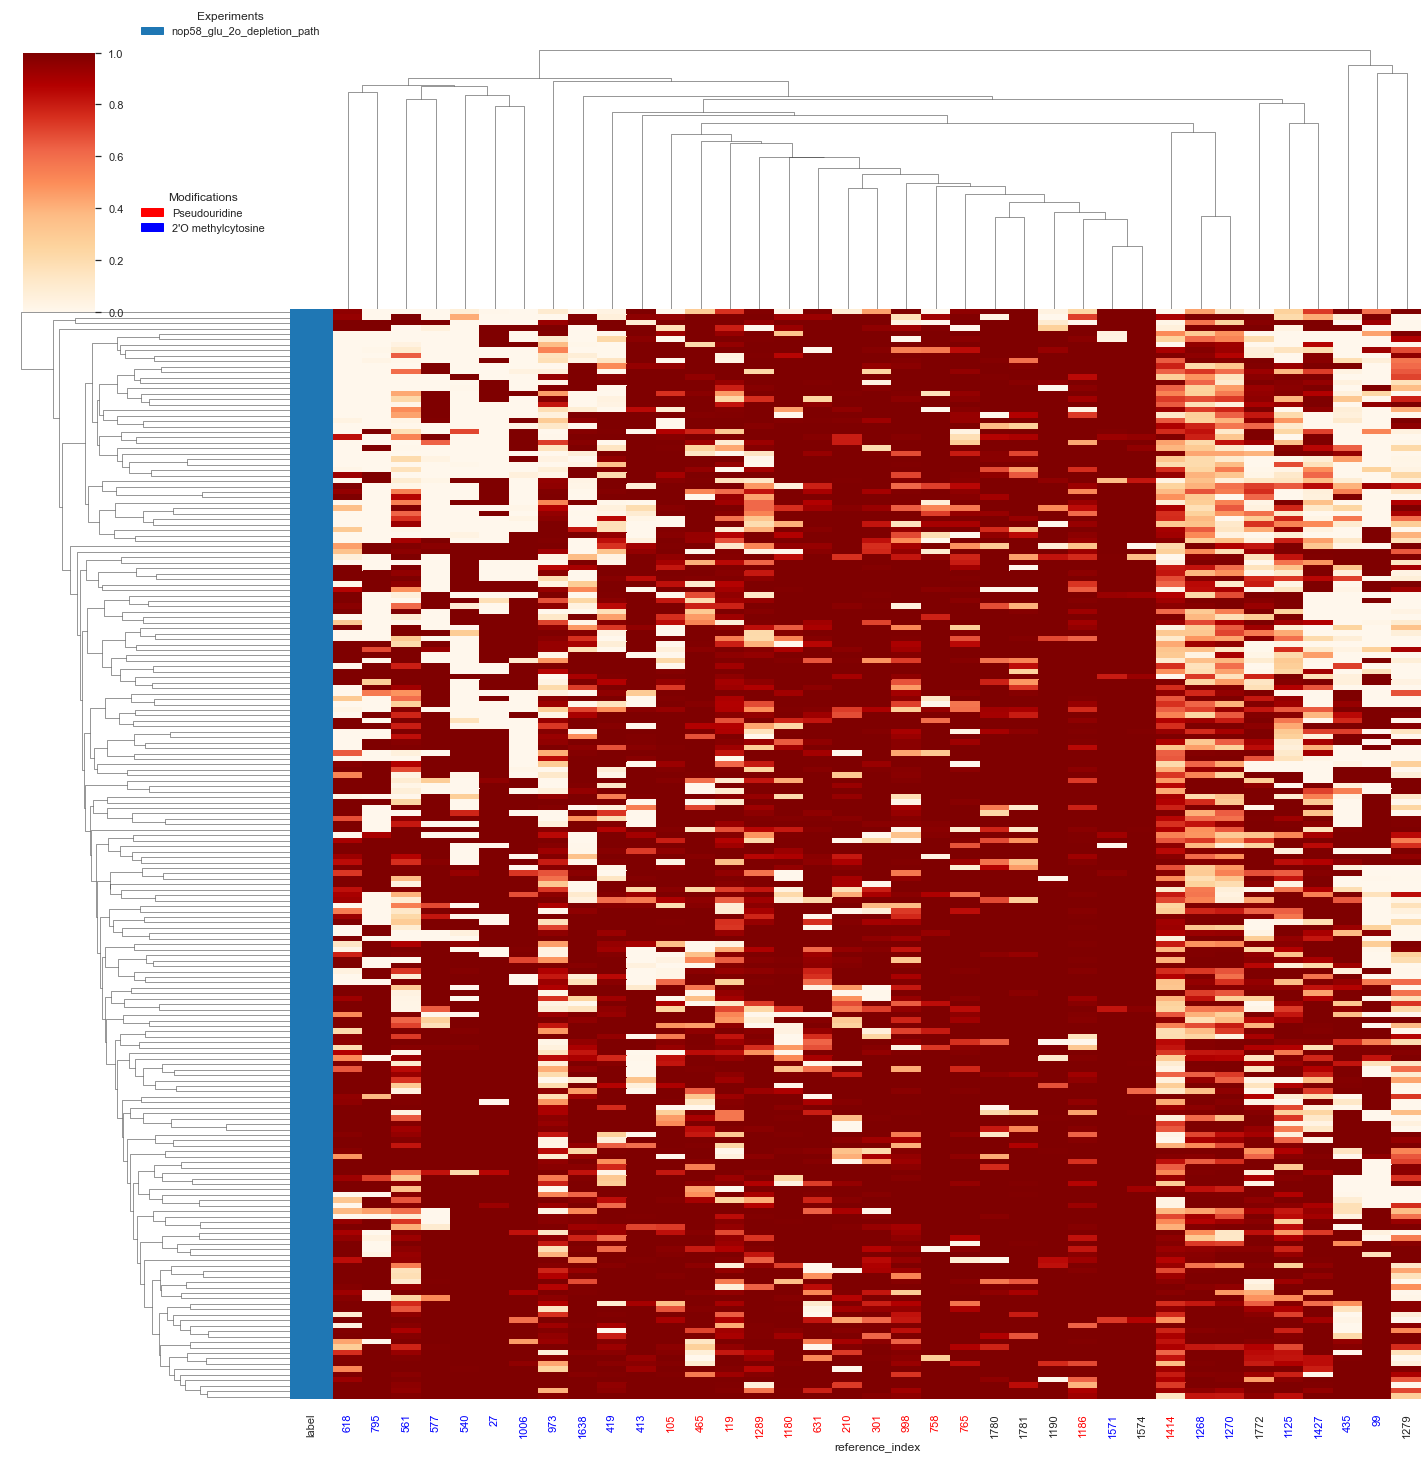

In [22]:
# 200 reads 18S

n = 200
vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                          metric=metric,
                          method=method)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

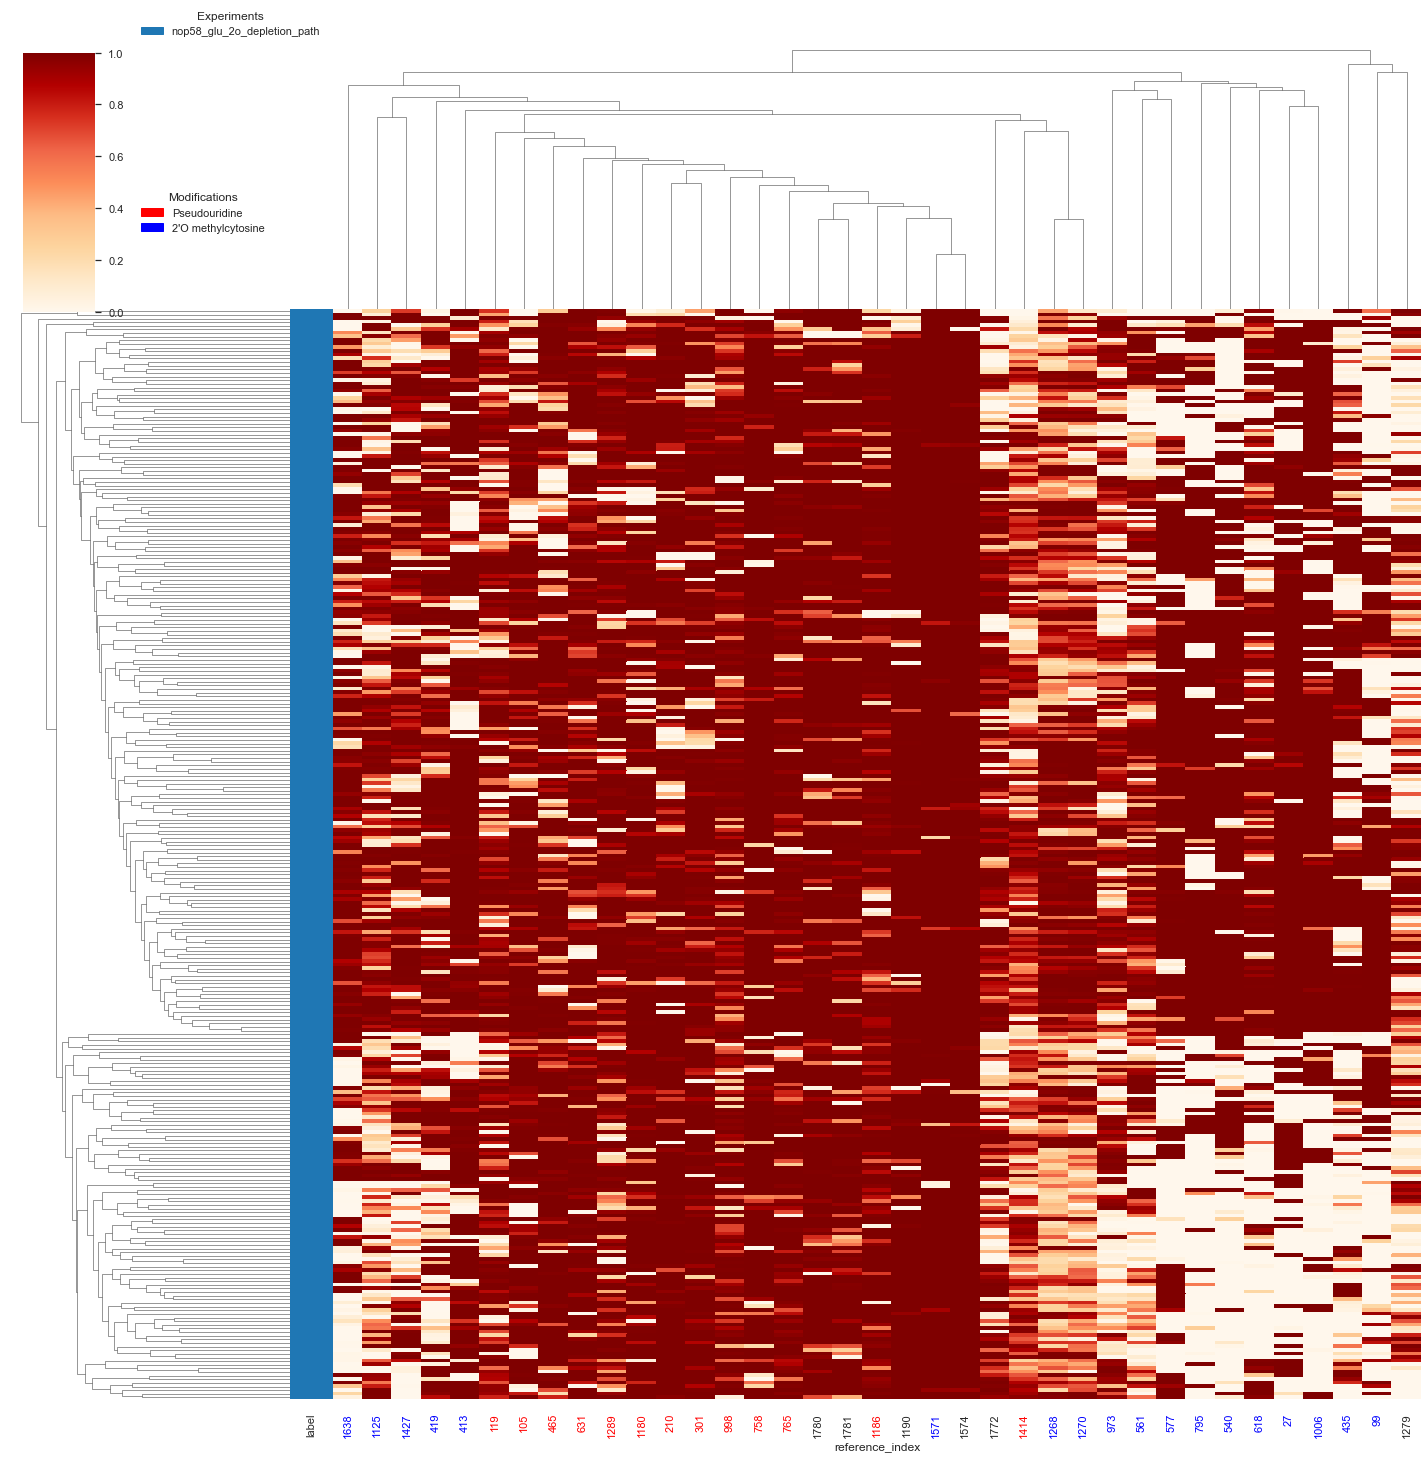

In [21]:
# 300 reads 18S

n = 300
vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                          metric=metric,
                          method=method)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

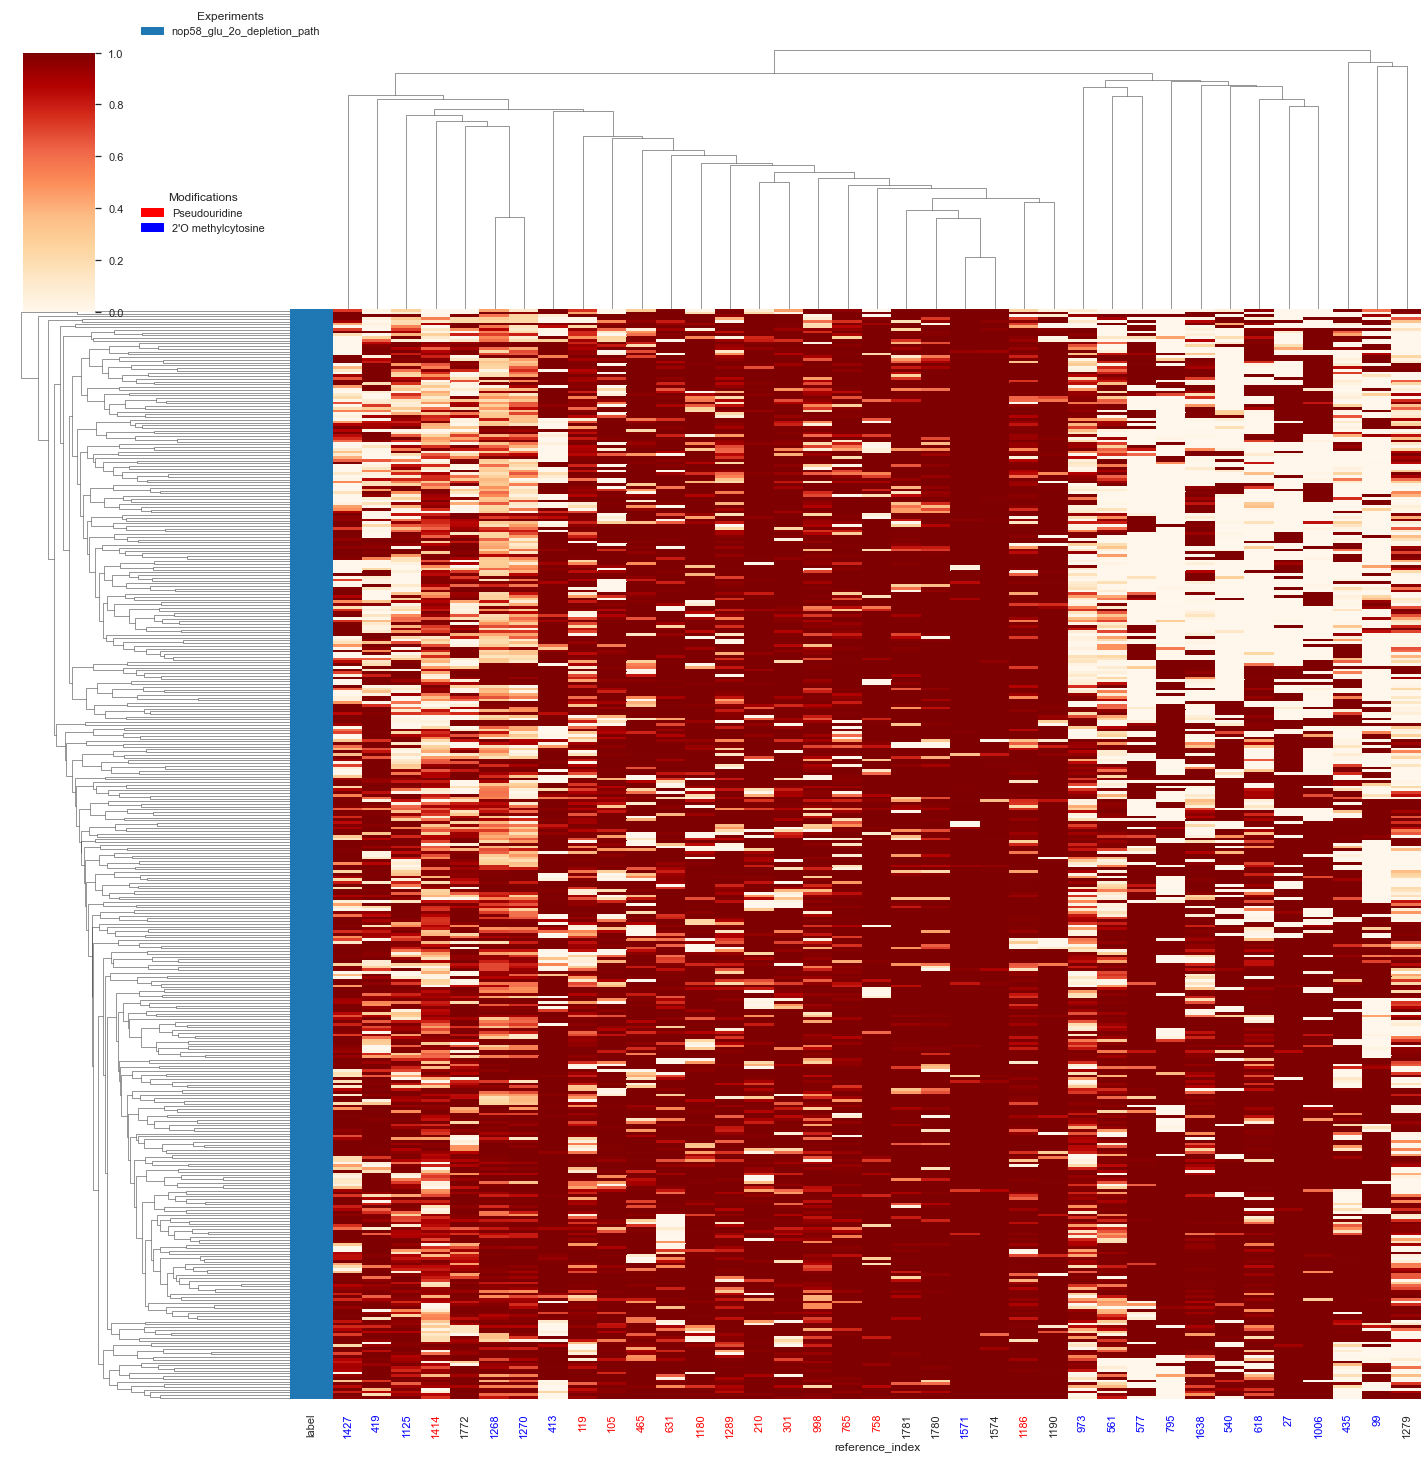

In [23]:
# 400 reads 18S

n = 400
vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                          metric=metric,
                          method=method)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

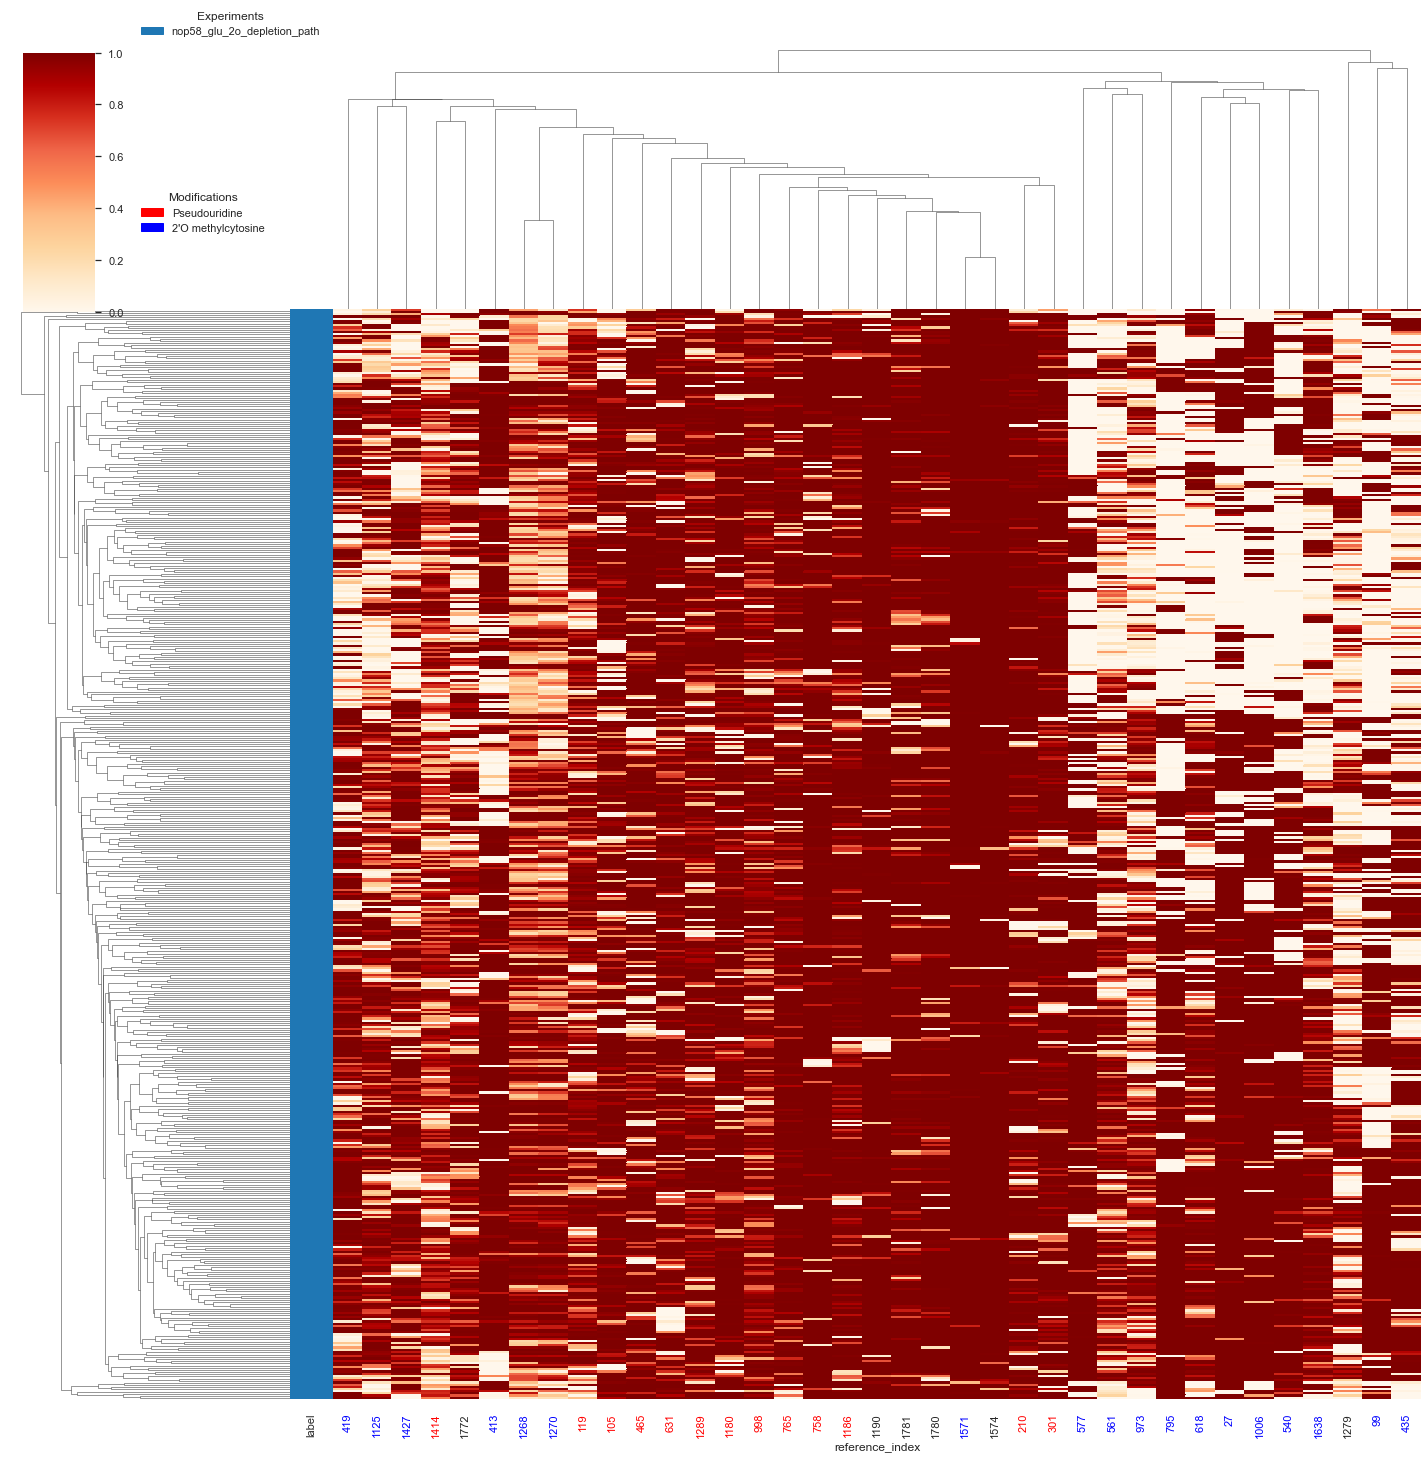

In [26]:
# 500 reads 18S

n = 500
vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=figure_path,
                          metric=metric,
                          method=method)
